In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors

# Base de dados

In [2]:
df = pd.read_excel('../Base120.xlsx')

In [3]:
def filtra_por_solucao(df, vet_solucao):
    '''Recebe um vetor solução e retorna o df filtrado para essa solução'''
    stand_prescription_map = {i + 1: vet_solucao[i] for i in range(len(vet_solucao))}
    filtered_df = df[df.apply(lambda row: row['prescrição'] == stand_prescription_map.get(row['talhao']), axis=1)]
    return filtered_df

def calcula_volume(result):
	"""
	Calculate the volume by summing specific columns of a DataFrame.
	This function takes a DataFrame `result` and returns the sum of the values
	in columns 3 to 18 (inclusive).
	Parameters:
	result (pandas.DataFrame): The input DataFrame containing the data.
	Returns:
	pandas.Series: A Series containing the sum of the specified columns.
	"""
	
    
	return result.iloc[:, 3:19].sum()

def calcula_penalidade(volume_anual):
    '''retorna penalidade por volume excedente/faltante (R$500)'''
    upper = []
    lower = []
    for v_ano in volume_anual:
        if v_ano < 140000:
            lower.append(np.abs(v_ano - 140000))
        elif v_ano > 160000:
            upper.append(np.abs(v_ano - 160000))
    return np.sum(upper + lower)*500

def calcula_vpl_aux(result, volume_ano):
    '''Calcula o VPL penalizado (função auxiliar)'''
    return np.sum(result['VPL']) - calcula_penalidade(volume_ano)

def plota_volume(df, vet_sol):
    '''Plota o gráfico do volume nos anos'''
    volume_ano = filtra_por_solucao(df, vet_sol).iloc[:, 3:19].sum()
    (volume_ano/1000).plot(kind='bar')
    plt.hlines(140, xmin=-1, xmax=16, color='red', alpha=.6)
    plt.hlines(160, xmin=-1, xmax=16, color='red', alpha=.6)
    plt.title("Volume de madeira por ano")
    plt.xlabel("Ano de Produção")
    plt.ylabel("Volume (1000 m$^3$)")

def calcula_volume_aux(df, vet_sol):
	"""
	Calculate the auxiliary volume based on the given solution vector.
	This function filters the DataFrame `df` using the solution vector `vet_sol`
	and then sums the values in columns 3 to 18 (inclusive) of the filtered DataFrame.
	Parameters:
	df (pandas.DataFrame): The input DataFrame containing the data.
	vet_sol (list or array-like): The solution vector used to filter the DataFrame.
	Returns:
	pandas.Series: A Series containing the sum of the values in columns 3 to 18 of the filtered DataFrame.
	"""
    
	return filtra_por_solucao(df, vet_sol).iloc[:, 3:19].sum()

def calcula_vpl_total(df, vet_solucao):
    '''Calcula o VPL total penalizado'''
    result = filtra_por_solucao(df, vet_solucao)
    volume_ano = calcula_volume(result)
    return calcula_vpl_aux(result, volume_ano)

def encontra_pior_ano(df, sol):
    volume_ano = calcula_volume_aux(df, sol)
    return np.argmax(np.abs(volume_ano-160000)) + 1

def numpy_to_python(obj):
    '''Converte np.int e np.float para int e float dos dados do dicionário'''
    if isinstance(obj, (np.integer, np.floating)):
        return obj.item()
    
def python_to_numpy(dicionario):
    '''Converte int e float para np.int e np.float dos dados do dicionário'''
    for chave, subdict in dicionario.items():
        for subchave, valor in subdict.items():
            if isinstance(valor, int):
                subdict[subchave] = np.int64(valor)
            elif isinstance(valor, float):
                subdict[subchave] = np.float64(valor)
                
    dicionario = {np.int64(key): valor for key, valor in dicionario.items()}
    return dicionario

---

## Alteração na base de dados

In [4]:
df_2 = pd.read_csv('../base_reduzida.csv')
df_2 = df_2.rename(columns=lambda x: str(x))

---

## Cluster

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_2)

model3 = KMeans(n_clusters=3, random_state=42, n_init="auto")
model3.fit(X_scaled)

df_2['cluster'] = model3.labels_

c:\Users\ramos\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ramos\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ramos\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ramos\AppData\Local\Programs\Python\Python313\Lib\subprocess.py",

<Figure size 600x400 with 0 Axes>

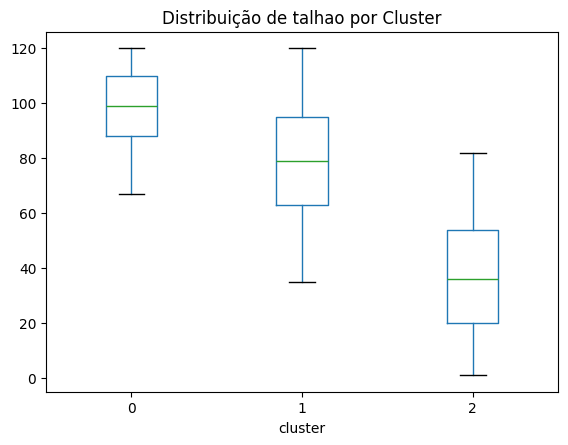

<Figure size 600x400 with 0 Axes>

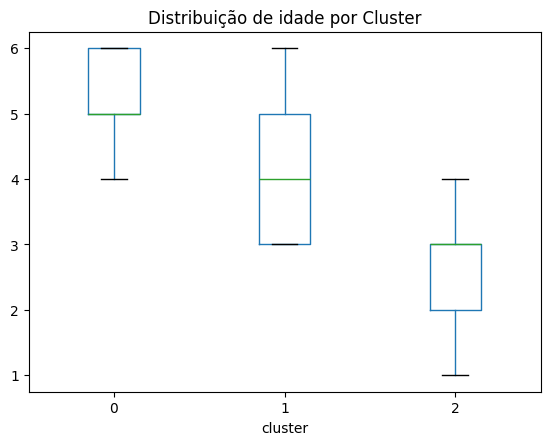

<Figure size 600x400 with 0 Axes>

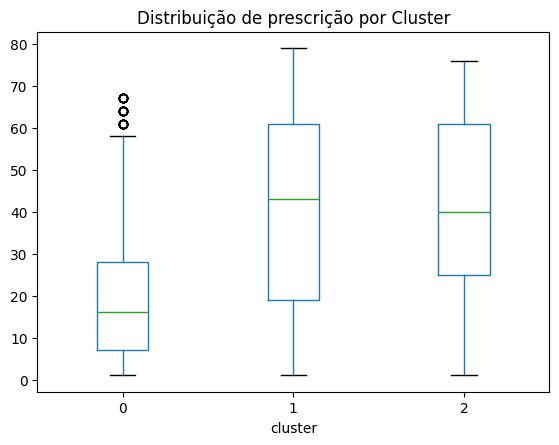

<Figure size 600x400 with 0 Axes>

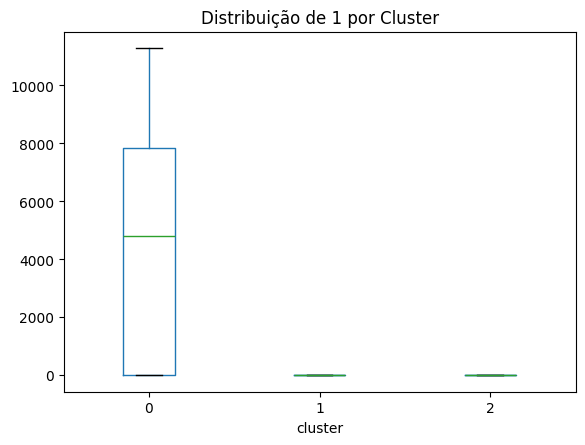

<Figure size 600x400 with 0 Axes>

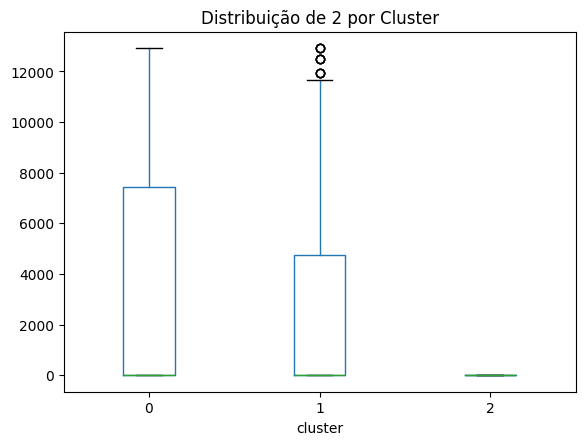

<Figure size 600x400 with 0 Axes>

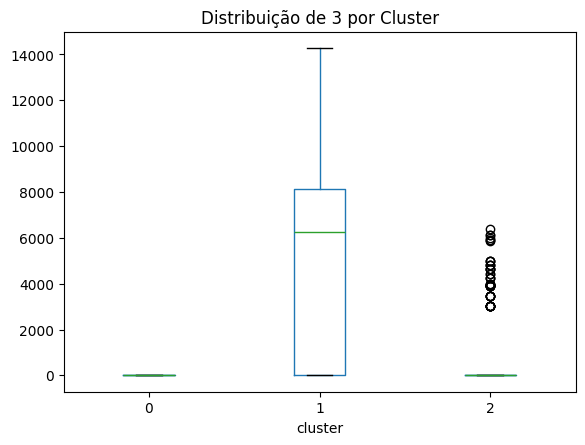

<Figure size 600x400 with 0 Axes>

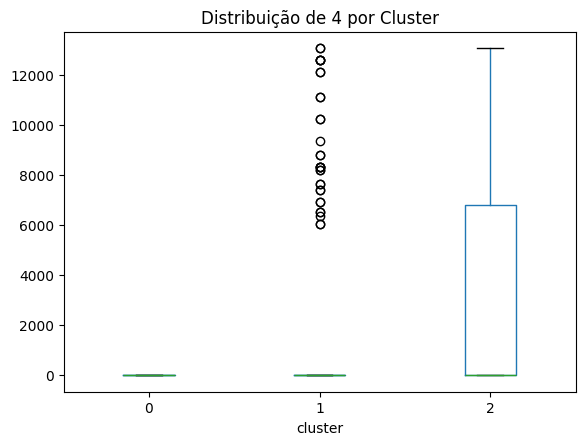

<Figure size 600x400 with 0 Axes>

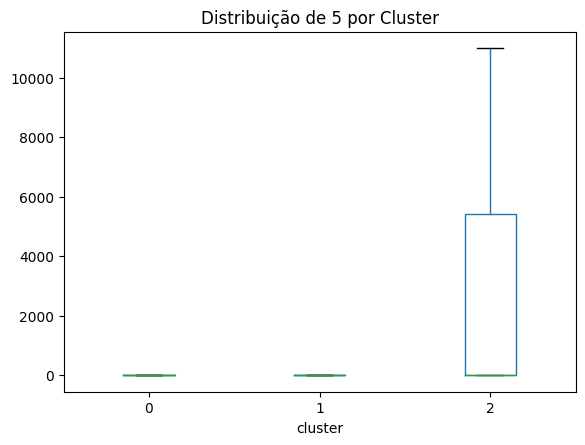

<Figure size 600x400 with 0 Axes>

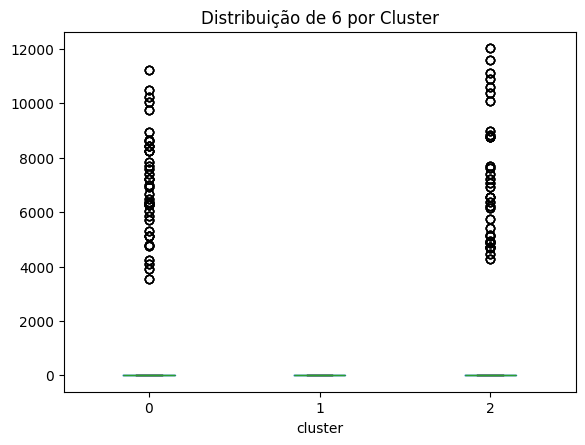

<Figure size 600x400 with 0 Axes>

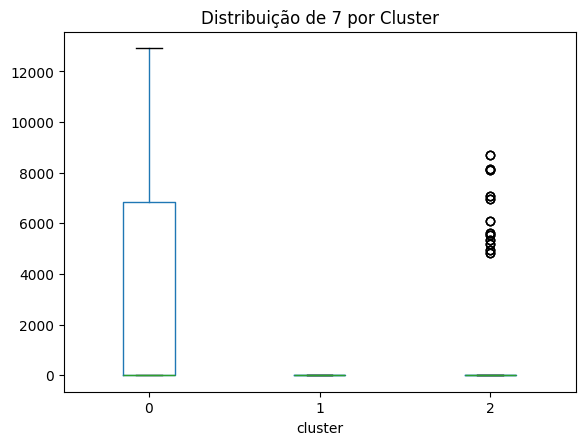

<Figure size 600x400 with 0 Axes>

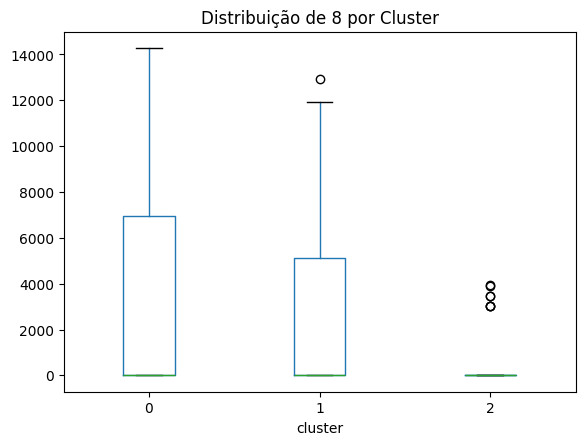

<Figure size 600x400 with 0 Axes>

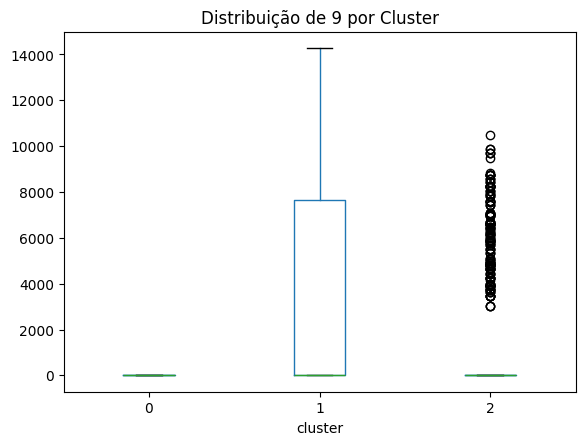

<Figure size 600x400 with 0 Axes>

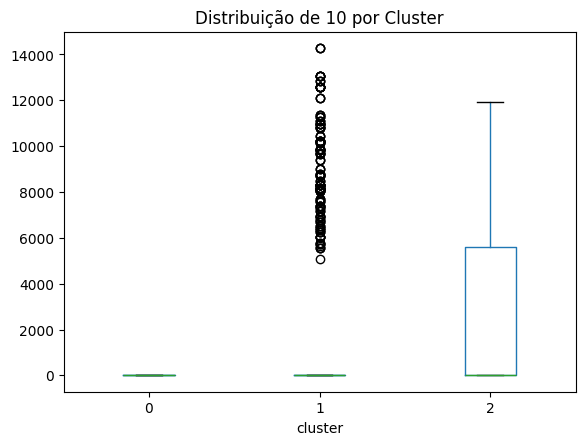

<Figure size 600x400 with 0 Axes>

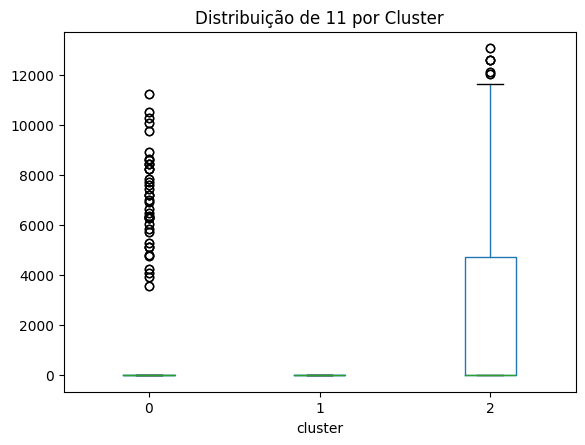

<Figure size 600x400 with 0 Axes>

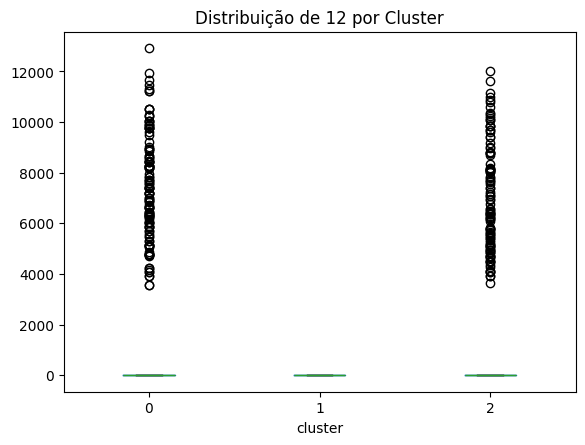

<Figure size 600x400 with 0 Axes>

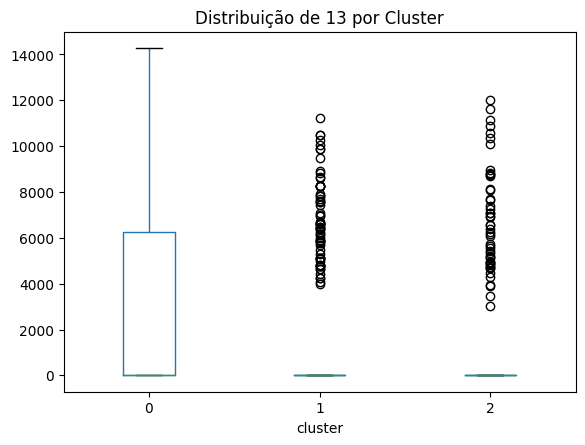

<Figure size 600x400 with 0 Axes>

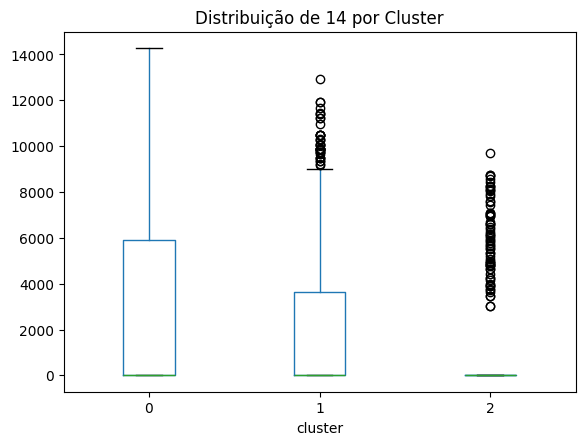

<Figure size 600x400 with 0 Axes>

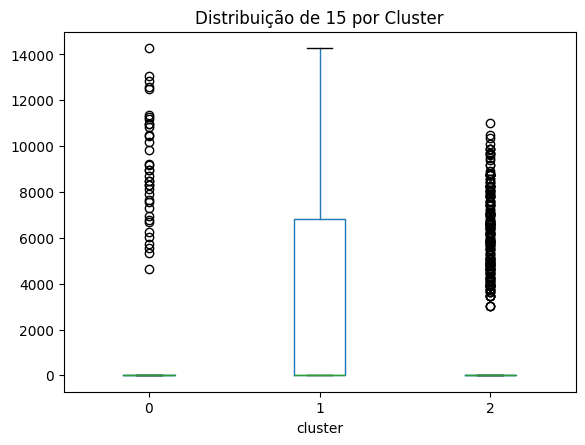

<Figure size 600x400 with 0 Axes>

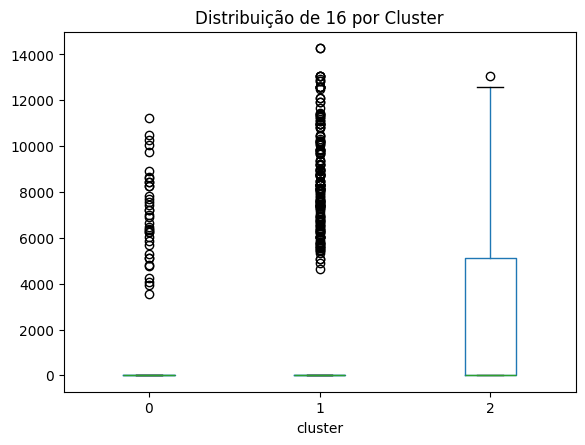

<Figure size 600x400 with 0 Axes>

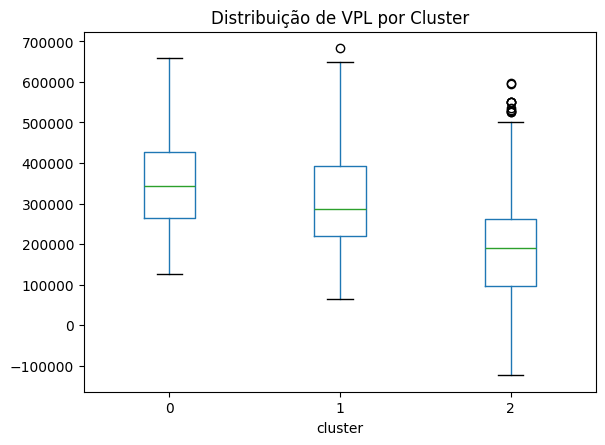

In [6]:
for col in df_2.columns[:-1]:  # Exclui a coluna 'Cluster'
    plt.figure(figsize=(6, 4))
    df_2.boxplot(column=col, by='cluster', grid=False)
    plt.title(f"Distribuição de {col} por Cluster")
    plt.suptitle("")
    plt.show()

Text(0.5, 0, 'VPL')

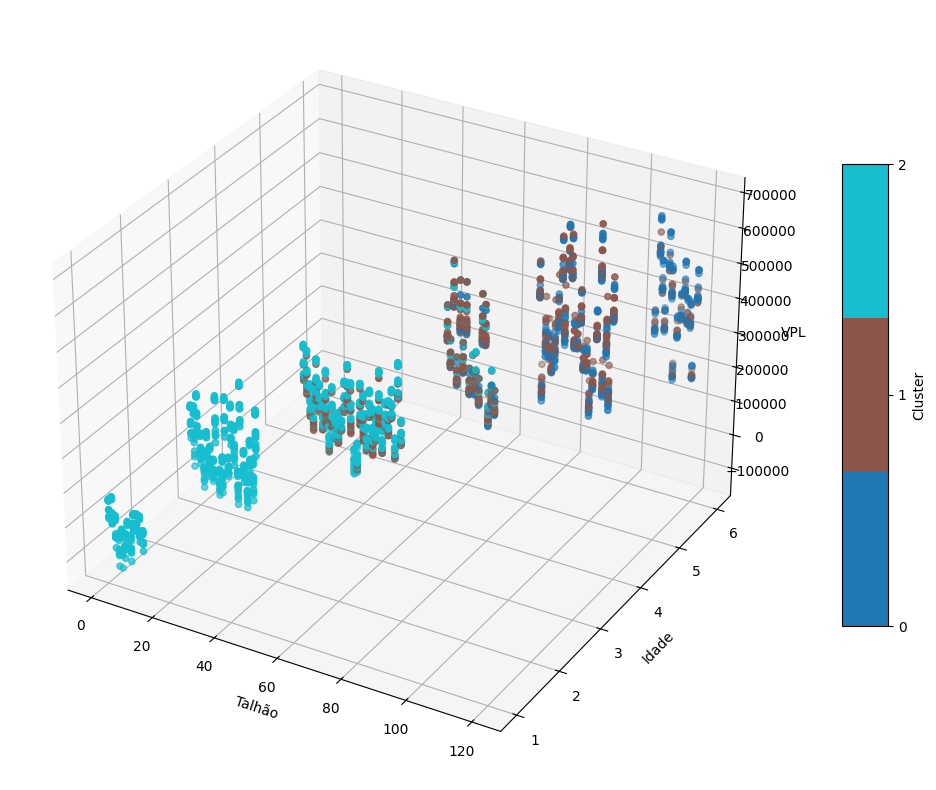

In [7]:
categorias = model3.labels_  # Valores inteiros de 0 a 2

# Definindo um mapa de cores discreto
cmap = plt.get_cmap("tab10", 3)
norm = mcolors.Normalize(vmin=0, vmax=2)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_2['talhao'], df_2['idade'], df_2['VPL'], c=categorias, cmap=cmap, norm=norm, marker='o')

cbar = fig.colorbar(sc, ax=ax, ticks=[0, 1, 2], shrink=0.6, aspect=10)
cbar.set_label('Cluster')

ax.set_xlabel('Talhão')
ax.set_ylabel('Idade')
ax.set_zlabel('VPL')

In [8]:
df_2

,talhao,idade,prescrição,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,VPL,cluster
0,1,1,1,0,0,0,0,4532,0,0,...,0,4532,0,0,0,0,4532,0,14703,2
1,1,1,4,0,0,0,0,4532,0,0,...,0,4532,0,0,0,0,0,5148,34285,2
2,1,1,7,0,0,0,0,4532,0,0,...,0,4532,0,0,0,0,0,0,61416,2
3,1,1,10,0,0,0,0,4532,0,0,...,0,0,5148,0,0,0,0,4532,34953,2
4,1,1,13,0,0,0,0,4532,0,0,...,0,0,5148,0,0,0,0,0,64729,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,120,6,67,0,8960,0,0,0,0,0,...,0,0,0,0,0,8190,0,0,410724,0
2638,120,6,70,0,8960,0,0,0,0,0,...,0,0,0,0,0,0,8960,0,417541,1
2639,120,6,73,0,8960,0,0,0,0,0,...,8960,0,0,0,0,7210,0,0,404173,1
2640,120,6,76,0,8960,0,0,0,0,0,...,8960,0,0,0,0,0,8190,0,415900,1


---

In [9]:
df_2.groupby('cluster')['prescrição'].nunique()
# df_2['prescrição'].nunique()

cluster
0    20
1    27
2    25
Name: prescrição, dtype: int64

---

# Algoritmo Genético

## Soluções importadas


In [10]:
with open("../solucoes_alpha.json", "r") as arquivo: # soluções geradas por heurística construtiva
    solucoes_alpha = json.load(arquivo)
solucoes_alpha = [np.array(sol) for sol in solucoes_alpha]

In [11]:
class solucao:
    def __init__(self, sol):
        self.sol = sol
        self.vpl = calcula_vpl_total(df_2, self.sol)
        global count_func_obj
        count_func_obj += 1
    
    def recalcula_vpl(self) -> None:
        self.vpl = calcula_vpl_total(df_2, self.sol)
        global count_func_obj
        count_func_obj += 1

In [12]:
# ok
def set_seed(seed_value=42) -> None:
    np.random.seed(seed_value)
    random.seed(seed_value)

# ok
def gera_populacao_inicial(n_pop, n_talhoes=120, perc_aleatoria=0.8) -> list[solucao]:
    
    global melhor_global
    populacao = [solucao(sol) for sol in np.random.randint(1, 121, size=(round(n_pop*perc_aleatoria), n_talhoes))]  # pop aleatória
    melhor_sol = solucoes_alpha[2]
    
    for _ in range(n_pop-round(n_pop*perc_aleatoria)): # quantidade soluções semi boas
        sol = np.copy(melhor_sol)
        random.shuffle(sol) # embaralha solução semi boa
        populacao.append(solucao(sol))
        
    melhor_global = max(populacao, key=lambda sol: sol.vpl)
    return populacao

# ok
def selecao(populacao, tam_torneio=4, metodo='torneio') -> np.ndarray[solucao]:
    
    pares = np.array([[],[]])

    # olhar probabilidade de cruzamento!!!
    for _ in range(round(len(populacao) / 2)): # quantidade de pares
        populacao_aux = populacao.copy()
        pop_torneio1 = random.sample(populacao_aux, tam_torneio)
        p1 = max(pop_torneio1, key=lambda sol_torneio: sol_torneio.vpl)
        populacao_aux.remove(p1)
        
        pop_torneio2 = random.sample(populacao_aux, tam_torneio)
        p2 = max(pop_torneio2, key=lambda sol_torneio: sol_torneio.vpl)
        pares = np.append(pares, [[p1], [p2]])
        
    return pares.reshape(round(len(populacao)/2), 2)

# ok
def recombinacao(pares, prob_mutacao) -> list[solucao]:
    
    global melhor_global
    filhos = []
    
    for pai1, pai2 in pares:
        pontos_crossover = [round(len(pares[0][0].sol) * random.random()) for _ in range(2)] # deixar apenas um crossover
        pontos_crossover.sort()
        crossover1 = pontos_crossover[0]
        # crossover2 = pontos_crossover[1]
        
        filho1 = solucao(np.concatenate((pai1.sol[:crossover1], 
                                         pai2.sol[crossover1:])))
        
        filho2 = solucao(np.concatenate((pai2.sol[:crossover1], 
                                         pai1.sol[crossover1:])))
        
        melhor_global = max(melhor_global, filho1, filho2, key=lambda aux: aux.vpl) # atualiza melhor_solucao antes da mutação
        if random.random() < prob_mutacao:
            mutacao(filho1)
            melhor_global = max(melhor_global, filho1, key=lambda aux: aux.vpl) # atualiza melhor_solucao após mutação
        if random.random() < prob_mutacao:
            mutacao(filho2)
            melhor_global = max(melhor_global, filho2, key=lambda aux: aux.vpl) # atualiza melhor_solucao após mutação
        
        filhos.append(filho1)
        filhos.append(filho2)
    return filhos

# ok
def mutacao(filho) -> None:
    talhoes_sorteados = [random.randrange(1, 121) for _ in range(2)]
    filho.sol[talhoes_sorteados[0]-1], filho.sol[talhoes_sorteados[1]-1] = filho.sol[talhoes_sorteados[1]-1], filho.sol[talhoes_sorteados[0]-1] # swap
    filho.recalcula_vpl()

# ok
def substituicao(pais, filhos, n_elite=10, tam_torneio=4) -> list[solucao]:
    ''' Mantem prop_elite% dos melhores pais mais o restante dos filhos aleatórios '''
    
    nova_pop = pais + filhos
    nova_pop = nova_pop.copy()
    nova_pop.sort(key=lambda sol: sol.vpl, reverse=True)
    elite = nova_pop[:n_elite]
    pop_restante = nova_pop[n_elite:]
    pop_subs = elite.copy()
    
    for _ in range(len(pais) - n_elite):
        populacao_aux = pop_restante.copy()
        pop_torneio1 = random.sample(populacao_aux, tam_torneio)
        sol_vencedora = max(pop_torneio1, key=lambda sol_torneio: sol_torneio.vpl)
        pop_subs.append(sol_vencedora)
        populacao_aux.remove(sol_vencedora)
    return pop_subs

def calcula_estatisticas(populacao, estatisticas) -> dict:
    lista_vpl = [sol.vpl for sol in populacao]
    estatisticas['avg'].append(np.mean(lista_vpl))
    estatisticas['std'].append(np.std(lista_vpl))
    estatisticas['max'].append(np.max(lista_vpl))
    estatisticas['min'].append(np.min(lista_vpl))


## Experimentos

In [13]:
set_seed(40)
num_exp = 15
res_calc_obj = {5000: [], 10000: [], 25000: [], 50000: []}

for _ in range(num_exp): # num de experimentos
    for quant_func_obj in res_calc_obj.keys(): # num de avaliações de função objetivo
        melhor_global = None
        count_func_obj = 0
        populacao = gera_populacao_inicial(40, perc_aleatoria=0.02) # pais
        while count_func_obj < quant_func_obj:
            pares = selecao(populacao, tam_torneio=4)
            filhos = recombinacao(pares, prob_mutacao=0.01)
            populacao = substituicao(populacao, filhos, n_elite=10, tam_torneio=2)
        res_calc_obj[quant_func_obj].append(melhor_global.vpl)

In [14]:
res_calc_obj

{5000: [np.int64(6421967),
  np.int64(-10970000),
  np.int64(7479363),
  np.int64(-8360252),
  np.int64(-10476462),
  np.int64(1744087),
  np.int64(-1216374),
  np.int64(10002281),
  np.int64(-6807544),
  np.int64(11529932),
  np.int64(-14926232),
  np.int64(-1045366),
  np.int64(6220758),
  np.int64(8253149),
  np.int64(6554814)],
 10000: [np.int64(19565615),
  np.int64(17148588),
  np.int64(14405124),
  np.int64(11965432),
  np.int64(5297959),
  np.int64(-5453086),
  np.int64(12948830),
  np.int64(10388630),
  np.int64(17663512),
  np.int64(10883293),
  np.int64(9146640),
  np.int64(22868922),
  np.int64(4569840),
  np.int64(13404776),
  np.int64(20751457)],
 25000: [np.int64(18354154),
  np.int64(19445186),
  np.int64(22679354),
  np.int64(2927771),
  np.int64(17456319),
  np.int64(-1968578),
  np.int64(25541033),
  np.int64(14438690),
  np.int64(28233256),
  np.int64(28287942),
  np.int64(14892229),
  np.int64(27054356),
  np.int64(15131389),
  np.int64(21682053),
  np.int64(229039

In [16]:
for key, value in res_calc_obj.items():
    res_calc_obj[key] = np.mean(value)
res_calc_obj

{5000: np.float64(293608.06666666665),
 10000: np.float64(12370368.8),
 25000: np.float64(18470608.0),
 50000: np.float64(25636382.2)}

In [21]:
res_calc_obj = {5000: [np.int64(6421967),
  np.int64(-10970000),
  np.int64(7479363),
  np.int64(-8360252),
  np.int64(-10476462),
  np.int64(1744087),
  np.int64(-1216374),
  np.int64(10002281),
  np.int64(-6807544),
  np.int64(11529932),
  np.int64(-14926232),
  np.int64(-1045366),
  np.int64(6220758),
  np.int64(8253149),
  np.int64(6554814)],
 10000: [np.int64(19565615),
  np.int64(17148588),
  np.int64(14405124),
  np.int64(11965432),
  np.int64(5297959),
  np.int64(-5453086),
  np.int64(12948830),
  np.int64(10388630),
  np.int64(17663512),
  np.int64(10883293),
  np.int64(9146640),
  np.int64(22868922),
  np.int64(4569840),
  np.int64(13404776),
  np.int64(20751457)],
 25000: [np.int64(18354154),
  np.int64(19445186),
  np.int64(22679354),
  np.int64(2927771),
  np.int64(17456319),
  np.int64(-1968578),
  np.int64(25541033),
  np.int64(14438690),
  np.int64(28233256),
  np.int64(28287942),
  np.int64(14892229),
  np.int64(27054356),
  np.int64(15131389),
  np.int64(21682053),
  np.int64(22903966)],
 50000: [np.int64(29345928),
  np.int64(27798572),
  np.int64(21354400),
  np.int64(28402332),
  np.int64(26205846),
  np.int64(28262539),
  np.float64(29245765.0),
  np.int64(27375363),
  np.int64(29219113),
  np.int64(18315377),
  np.int64(26251428),
  np.int64(25773020),
  np.int64(19496107),
  np.int64(19048664),
  np.int64(28451279)]}

esta perdendo a melhor solução

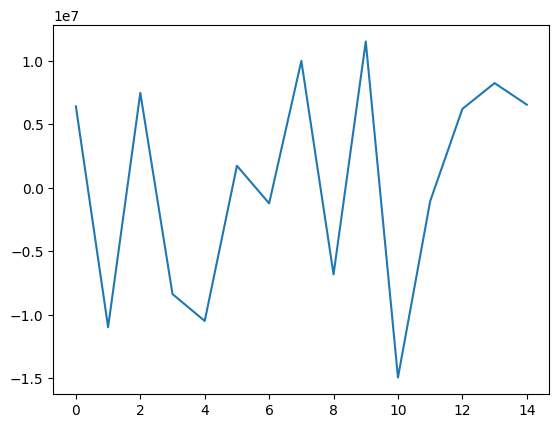

In [23]:
plt.plot(res_calc_obj[5000])